<img src="img/pandas_logo.svg" width="20%">

# Breve introduzione a Pandas

Pandas è una libreria Python per l'analisi e l'esplorazione dei dati. 

Pandas fornisce strutture dati e funzioni di manipolazione dati di facile accesso, grazie ad un'indicizzazione integrata. 

Le due principali strutture dati fornite da Pandas sono le ***Series*** e i ***DataFrame***. Le `Series` rappresentano dei vettori (unidimensionali) indicizzabili. I `DataFrame` rappresentano dati tabellari (bidimensionali) indicizzabili. 

Le principali funzionalità offerte da Pandas sono: 
* Importazione/esportazione dei dati da file in vari formati
* Generazione di statistiche e grafici
* Pulizia dei dati
* Selezione, filtraggio, inserimento, cancellazione ed aggregazione dei dati


Per qualunque ulteriore approfondimento è sempre utile consultare la <a href="https://pandas.pydata.org/pandas-docs/stable/reference/index.html">documentazione ufficiale Pandas</a> (sempre accessibile dal menu *Help* di Jupyter o scrivendo `?nome_di_funzione`).

## Importare il modulo Pandas

In [29]:
import pandas as pd
%matplotlib inline

# Esempio: Caricamento del dataset `Advertising`

In [30]:
df = pd.read_csv('data/Advertising.csv')

In [31]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


La prima colonna (`Unnamed: 0`) è inutile. Possiamo rimuoverla per nome: 

In [32]:
df = df.drop('Unnamed: 0', axis=1)

L'opzione `axis=1` indica che vogliamo rimuovere una colonna. (Con `axis=0` avremmo rimosso una riga).

In [33]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [35]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


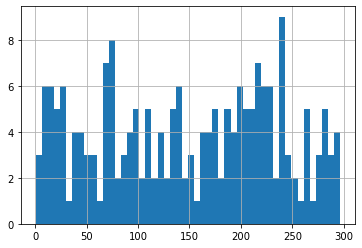

In [36]:
df['TV'].hist(bins=50);

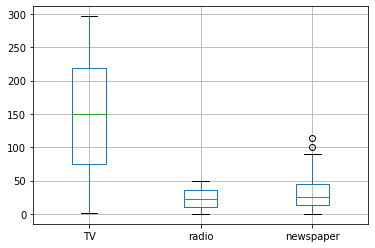

In [37]:
df.boxplot(['TV', 'radio', 'newspaper']);

### Esploriamo le correlazioni tra le variabili

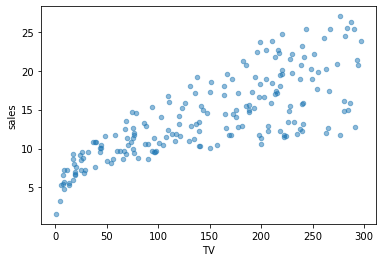

In [38]:
df.plot.scatter('TV', 'sales', alpha=0.5, figsize=(6, 4));

Il **coefficiente di correlazione** di Pearson tra due vettori di osservazioni $x$ e $y$ è definito come: 

$$ \rho_{xy} = \frac{\sum_{i=1}^m (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^m (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^m (y_i - \bar{y})^2}} $$

dove $\bar{x}$ è la media degli $x_i$ e $\bar{y}$ la media degli $y_i$. 

E' un valore tra -1 e +1, pari a +1 se le variabili sono perfettamente *correlate*, a 0 se sono *scorrelate* e a -1 se sono perfettamente *anticorrelate*. 

Calcoliamo il coefficiente di correlazione tra `TV` e `sales`:

In [39]:
df['TV'].corr(df['sales'])

0.7822244248616061

Può essere utile avere una panoramica delle correlazioni tra tutte le coppie di variabili:

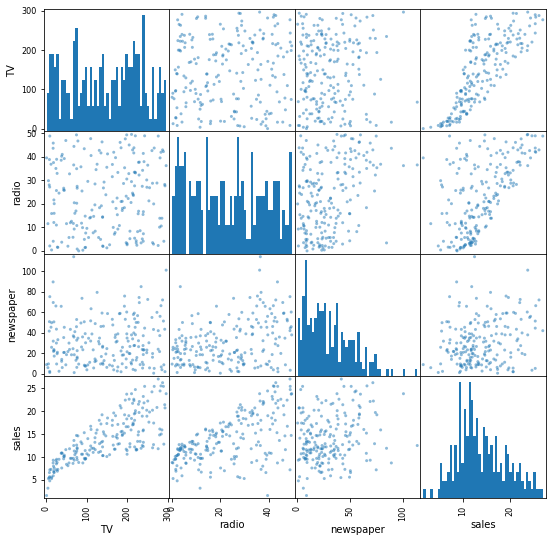

In [40]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df, figsize=(9, 9), hist_kwds={'bins':50});

# Le strutture dati di Pandas
## La struttura dati `Series`
Le `Series` di Pandas sono array unidimensionali indicizzabili attraverso nomi. 

In [41]:
ser = pd.Series(data=[100, 200, 300, 400, 500], 
                index=['tom', 'bob', 'nancy', 'dan', 'eric'])

In [42]:
ser

tom      100
bob      200
nancy    300
dan      400
eric     500
dtype: int64

In [43]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [44]:
ser['nancy']

300

In [45]:
ser[[4, 3, 1]]

eric    500
dan     400
bob     200
dtype: int64

In [46]:
'bob' in ser

True

**Importante**: Le `Series` operano in modo molto simile agli ndarray NumPy, e sono un argomento valido per la maggior parte delle funzioni NumPy. Ecco qualche esempio: 

In [47]:
ser

tom      100
bob      200
nancy    300
dan      400
eric     500
dtype: int64

In [48]:
ser * 2

tom       200
bob       400
nancy     600
dan       800
eric     1000
dtype: int64

In [49]:
ser ** 2

tom       10000
bob       40000
nancy     90000
dan      160000
eric     250000
dtype: int64

In [50]:
import numpy as np
np.exp(ser)

tom       2.688117e+43
bob       7.225974e+86
nancy    1.942426e+130
dan      5.221470e+173
eric     1.403592e+217
dtype: float64

Nonostante possa spesso essere usato come se fosse un `ndarray`, è utile tenere presente che un oggetto di tipo `Series` **non** è un `ndarray` (per esempio, a differenza di un `ndarray` può avere elementi *nulli*). Qualora si renda necessario convertirlo in un `ndarray`, si può usare il metodo `.to_numpy()`: 

In [51]:
x = ser.to_numpy()
print(type(x))
x

<class 'numpy.ndarray'>


array([100, 200, 300, 400, 500], dtype=int64)

## La struttura dati `DataFrame`
I `DataFrame` di Pandas sono array bidimensionali (tabelle) indicizzabili attraverso nomi. Ogni colonna della tabella consiste di un oggetto di tipo `Series`. 

### Creazione di un DataFrame da un dizionario di Series

In [52]:
d = {'one' : pd.Series([100., 200., 300.], 
                       index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], 
                       index=['apple', 'ball', 'cerill', 'dancy'])}

In [53]:
df = pd.DataFrame(d)
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [54]:
print(type(df))
print(df.shape)
print(type(df['one']))
print(df['one'].shape)

<class 'pandas.core.frame.DataFrame'>
(5, 2)
<class 'pandas.core.series.Series'>
(5,)


In [55]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [56]:
df.columns

Index(['one', 'two'], dtype='object')

In [57]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [58]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


### Creazione di un DataFrame da un ndarray NumPy
La seguente cella di codice crea un semplice DataFrame di 10 celle organizzate come segue: 

  * 5 righe
  * 2 colonne, una di nome `temperature` e l'altra di nome `activity`

In [60]:
# Crea e popola un ndarray 5 x 2
import numpy as np
my_data = np.array([[0, 3], [10, 7], [20, 9], [30, 14], [40, 15]])

# Crea una lista Python con i nomi delle 2 colonne
my_column_names = ['temperature', 'activity']

# Crea un DataFrame con i dati dell'array e i nomi delle colonne
my_dataframe = pd.DataFrame(data=my_data, columns=my_column_names)

# Visualizza il DataFrame
my_dataframe

,temperature,activity
0,0,3
1,10,7
2,20,9
3,30,14
4,40,15


### Aggiunta di una colonna ad un DataFrame

Possiamo aggiungere una colonna ad un DataFrame esistente semplicemente assegnando dei valori ad un nuovo nome colonna. Per esempio, il seguente codice crea una terza colonna di nome `adjusted` all'intero di `my_dataframe`: 

In [61]:
# Crea una nuova colonna di nome `adjusted`
my_dataframe["adjusted"] = my_dataframe["activity"] + 2

# Visualizza il DataFrame
my_dataframe

,temperature,activity,adjusted
0,0,3,5
1,10,7,9
2,20,9,11
3,30,14,16
4,40,15,17


### Selezione di righe e/o colonne specifiche di un DataFrame

Pandas fornisce vari modi di isolare righe, colonne, slice e/o celle specifiche di un DataFrame. 

In [62]:
print("Righe #0, #1, and #2:")
my_dataframe.head(3)

Righe #0, #1, and #2:


,temperature,activity,adjusted
0,0,3,5
1,10,7,9
2,20,9,11


In [63]:
print("Riga #2:")
my_dataframe.iloc[2]

Riga #2:


temperature    20
activity        9
adjusted       11
Name: 2, dtype: int32

In [64]:
print("Righe #1, #2, and #3:")
my_dataframe[1:4]

Righe #1, #2, and #3:


,temperature,activity,adjusted
1,10,7,9
2,20,9,11
3,30,14,16


In [65]:
print("Colonna 'temperature':")
my_dataframe['temperature']

Colonna 'temperature':


0     0
1    10
2    20
3    30
4    40
Name: temperature, dtype: int32

### Compatibilità con NumPy
Le operazioni e funzioni di NumPy che operano elemento per elemento possono essere applicate ad un `DataFrame` contenente valori numerici, come se quel DataFrame se fosse un `ndarray`. Ad esempio: 

In [66]:
np.sqrt(my_dataframe)

,temperature,activity,adjusted
0,0.000000,1.732051,2.236068
1,3.162278,2.645751,3.000000
2,4.472136,3.000000,3.316625
3,5.477226,3.741657,4.000000
4,6.324555,3.872983,4.123106


Ciononostante, è utile tenere a mente che un `DataFrame` **non** è un `ndarray`. Qualora si renda necessario convertirlo in un `ndarray`, si può usare la funzione NumPy `np.asarray`: 

In [67]:
X = np.asarray(my_dataframe)
print(type(X))
X

<class 'numpy.ndarray'>


array([[ 0,  3,  5],
       [10,  7,  9],
       [20,  9, 11],
       [30, 14, 16],
       [40, 15, 17]])

# Esercizio 1: Esplorare un dataset 

Utilizzando Pandas, caricate il dataset `data/titanic_train.csv`. 

Questo dataset contiene i dati di alcuni passeggeri del *Titanic*, inclusa l'età, il sesso, la classe di viaggio e se sono sopravvisuti o no. 

Le variabili incluse sono le seguenti. 

| Variabile | Significato              | Legenda                   |
|-----------|--------------------------|---------------------------|
| Survived  | Sopravvissuto            | 0 = No, 1 = Sì            |
| Pclass    | Classe di viaggio        | 1 = 1ª, 2 = 2ª, 3 = 3ª    |
| Name      | Nome                     |                           |
| Sex       | Sesso                    | male = M, female = F      |
| Age       | Età in anni              |                           |
| SibSp     | n. di fratelli / coniugi a bordo del Titanic      |                           |
| Parch     | n. di genitori / figli a bordo del Titanic      |                           |
| Ticket    | Numero del biglietto      |                           |
| Fare      | Prezzo del biglietto (in sterline) |                           |
| Cabin    | Numero di cabina            |                           |
| Embarked | Porto di imbarco     | C = Cherbourg, Q = Queenstown, S = Southampton           |

Utilizzando Pandas, rispondete alle seguenti domande:

1. Quanti sono i passeggeri nel dataset? 
2. Qual era il prezzo medio del biglietto? 
3. Quanti passeggeri sono di sesso femminile? 
4. Qual è la percentuale di passeggeri sopravvissuti? 
5. Qual è la percentuale di passeggeri sopravvissuti *tra quelli di sesso femminile*? 